<a href="https://colab.research.google.com/github/Sabarinathan-369/Object-Detection-and-Image-Classification-by-PyTorch/blob/main/PyTorch_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow


In [ ]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 150MB/s]


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget 'http://farm8.staticflickr.com/7055/6977886237_b97aae6111_z.jpg'
ig=Image.open('6977886237_b97aae6111_z.jpg')

--2025-06-29 06:02:09--  http://farm8.staticflickr.com/7055/6977886237_b97aae6111_z.jpg
Resolving farm8.staticflickr.com (farm8.staticflickr.com)... 18.64.173.84, 2600:9000:2342:2000:0:5a51:64c9:c681, 2600:9000:2342:5200:0:5a51:64c9:c681, ...
Connecting to farm8.staticflickr.com (farm8.staticflickr.com)|18.64.173.84|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm8.staticflickr.com/7055/6977886237_b97aae6111_z.jpg [following]
--2025-06-29 06:02:09--  https://farm8.staticflickr.com/7055/6977886237_b97aae6111_z.jpg
Connecting to farm8.staticflickr.com (farm8.staticflickr.com)|18.64.173.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘6977886237_b97aae6111_z.jpg’

6977886237_b97aae61     [ <=>                ] 101.45K  --.-KB/s    in 0.03s   

2025-06-29 06:02:10 (3.63 MB/s) - ‘6977886237_b97aae6111_z.jpg’ saved [103883]



In [ ]:
transform = transforms.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred= model([img])

pred

[{'boxes': tensor([[309.0958,  63.5215, 474.6726, 283.4102],
          [142.1641, 201.1371, 177.9371, 322.1433],
          [477.6090,  20.5028, 638.0315, 315.2070],
          [278.2620, 132.5422, 289.4898, 166.5086],
          [246.1669, 165.6493, 328.3994, 185.4765],
          [197.9198, 243.6244, 224.8603, 315.2574],
          [292.8810, 136.2804, 305.1291, 167.4614],
          [217.9661, 150.4079, 232.9519, 175.3837],
          [181.8570, 259.5738, 196.2467, 285.6207],
          [ 54.5504, 321.8590, 221.8079, 415.8875],
          [126.9103, 253.1480, 637.0540, 427.0000],
          [417.6645, 293.7536, 451.6682, 317.3767],
          [222.9831, 306.5103, 317.7137, 343.7625],
          [421.2301, 284.9128, 459.2313, 314.9867],
          [581.6581, 290.3763, 640.0000, 364.5786],
          [309.6071, 305.4151, 393.4950, 347.2155],
          [134.7460, 180.2035, 236.3755, 262.6438],
          [275.3441, 290.2901, 393.4858, 301.4442],
          [ 78.1778, 237.6546, 118.8597, 296.3585],
   

In [ ]:
bboxes,labels,scores=pred[0]["boxes"],pred[0]["labels"],pred[0]["scores"]

In [ ]:
num=torch.argwhere(scores>0.8).shape[0]

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" , "clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

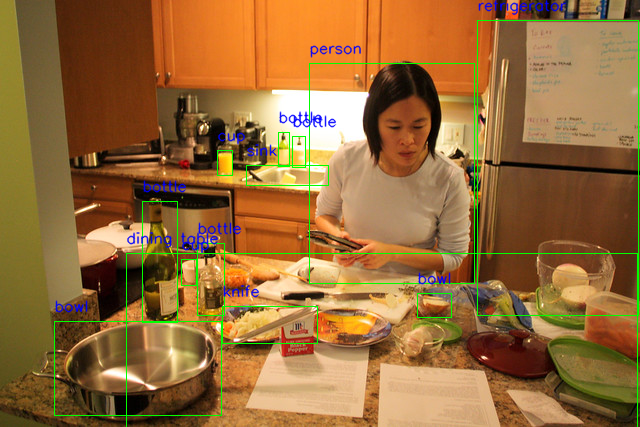

In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX
igg=cv2.imread("/content/6977886237_b97aae6111_z.jpg")
for i in range(num):
  x1,y1,x2,y2=bboxes[i].numpy().astype('int')
  class_name=coco_names[labels.numpy()[i]-1]
  igg=cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  igg=cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)
cv2_imshow(igg)